# Pyber Ride Sharing

In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
#Import csv files
city_file = os.path.join('Resources', 'city_data.csv')
ride_file = os.path.join('Resources', 'ride_data.csv')

In [3]:
#Read files
city_data = pd.read_csv(city_file)
ride_data = pd.read_csv(ride_file)

In [4]:
#Print city data head
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
#Print ride data head
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [6]:
#Merge and clean up data so there aren't duplicate ride IDs
city_data = city_data.drop_duplicates('city', keep='first')
merged_data = city_data.merge(ride_data, on = 'city')

In [7]:
#View new dataframe head
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# Bubble Plot of Ride Sharing Data

In [8]:
#Set variables for bubble plot data
city_name = merged_data.groupby('city')
total_rides = city_name['ride_id'].count()
average_fare = city_name['fare'].mean()
city_type = city_data.set_index('city')['type']
total_drivers = city_name['driver_count'].count()

In [9]:
#Create dataframe with variables
city_df = pd.DataFrame({
    "Average Fare ($) Per City": average_fare,
    "Total Number of Rides Per City": total_rides,
    "Total Number of Drivers Per City": total_drivers,
    "City Type": city_type})

In [10]:
#View new dataframe head
city_df.head()

,Average Fare ($) Per City,City Type,Total Number of Drivers Per City,Total Number of Rides Per City
Alvarezhaven,23.928710,Urban,31,31
Alyssaberg,20.609615,Urban,26,26
Anitamouth,37.315556,Suburban,9,9
Antoniomouth,23.625000,Urban,22,22
Aprilchester,21.981579,Urban,19,19


In [11]:
#Split city types into separate dataframe categories
rural = city_df[city_df['City Type'] == 'Rural']
suburban = city_df[city_df['City Type'] == 'Suburban']
urban = city_df[city_df['City Type'] == 'Urban']

In [12]:
#Assign the color dictionary
color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
city_color = {'Urban': color_scheme['Light Coral'], 'Suburban': color_scheme['Light Sky Blue'], 'Rural': color_scheme['Gold']}

In [16]:
#Give titles to scatter plot and axes
plt.suptitle('Pyber Ride Sharing Data 2016')
plt.title('Note: Circle size correlates with driver count per city.')
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

#Use Seaborn style for scatter plot
plt.style.use('seaborn')

In [17]:
#Make three scatter plots for each city type on one graph
plt.scatter(rural['Total Number of Rides Per City'], rural['Average Fare ($) Per City'], s = rural['Total Number of Drivers Per City']*10, color = city_color['Rural'], edgecolor = 'black', alpha = .75)
plt.scatter(suburban['Total Number of Rides Per City'], suburban['Average Fare ($) Per City'], s = suburban['Total Number of Drivers Per City']*10, color = city_color['Suburban'], edgecolor = 'black', alpha = .75)
plt.scatter(urban['Total Number of Rides Per City'], urban['Average Fare ($) Per City'], s = urban['Total Number of Drivers Per City']*10, color = city_color['Urban'], edgecolor = 'black', alpha = .75)

#Add a legend in the upper right corner
plt.legend(['Rural', 'Suburban', 'Urban'], loc="upper right", title="City Type")

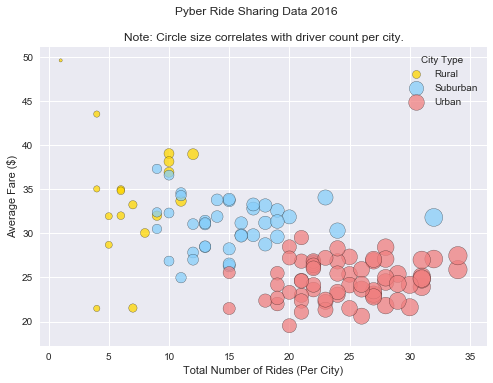

In [18]:
#Save png and show plot
#plt.savefig('ride_sharing_data.png')
plt.show()

# Total Fares by City Type

In [19]:
#Print columns to check names
merged_data.columns

Index(['city', 'driver_count', 'type', 'date', 'fare', 'ride_id'], dtype='object')

In [20]:
#Create a variable to use for next three pie charts
city_by_type = merged_data.groupby('type')['type', 'ride_id', 'fare', 'driver_count']
#city_by_type.head()

In [21]:
#Calculate the total number of fares by city
city_fares = city_by_type.sum()['fare']

In [22]:
#Assign labels to pie chart
labels = city_fares.index

In [23]:
#Set colors and explode, design pie chart and give title
colors = [city_color[n] for n in labels]
explode = [0, 0, .05]
plt.pie(city_fares, startangle=110, colors=colors, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops = {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Fares by City Type")

Text(0.5,1,'% of Total Fares by City Type')

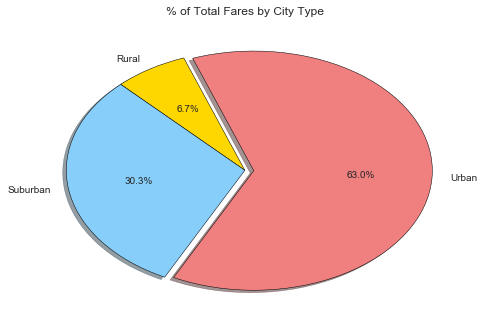

In [24]:
#Save png and show chart
#plt.savefig('fares_by_city_type.png')
plt.show()

# Total Rides by City Type

In [25]:
#Count total rides using ride IDs by city type
rides_by_city = city_by_type.count()['ride_id']

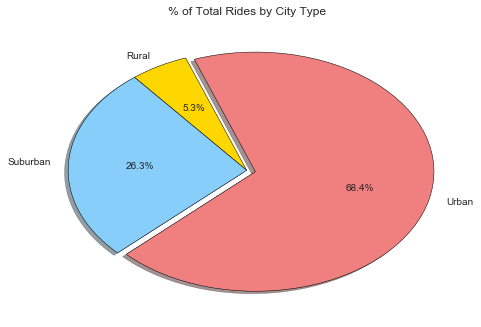

In [26]:
#Design pie chart, save png and print
labels = rides_by_city.index
plt.pie(rides_by_city, startangle=110, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops= {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Rides by City Type")
#plt.savefig('rides_by_city_type.png')
plt.show()

# Total Drivers by City Type

In [27]:
#Count total number of drivers by city type
drivers_sum = city_by_type.sum()['driver_count']

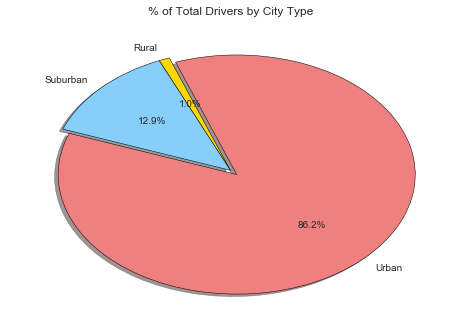

In [28]:
#Design chart, save png and print
labels = drivers_sum.index
plt.pie(drivers_sum, startangle=110, explode=explode, colors=colors, labels=labels, autopct="%1.1f%%", shadow=True, wedgeprops= {'linewidth': .5, 'edgecolor': 'black'})
plt.title("% of Total Drivers by City Type")
#plt.savefig('drivers_by_city_type.png')
plt.show()